<a href="https://colab.research.google.com/github/KenDaupsey/Comparing-Linear-Regression-Models-Python/blob/main/Comparing_Linear_Regression_Models_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Comparing Linear Regression Models  Python***

In [1]:
### Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [16]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)

url= "https://raw.githubusercontent.com/KenDaupsey/Comparing-Linear-Regression-Models-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,male,white,low,public,general,57,52,41,47,57
1,121,female,white,middle,public,vocation,68,59,53,63,61
2,86,male,white,high,public,general,44,33,54,58,31
3,141,male,white,high,public,vocation,63,44,47,53,56
4,172,male,white,middle,public,academic,47,52,57,53,61


In [12]:
df.columns

Index(['id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst'],
      dtype='object')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,200.0,100.500,57.879185,1.0,50.75,100.5,150.25,200.0
read,200.0,52.230,10.252937,28.0,44.00,50.0,60.00,76.0
write,200.0,52.775,9.478586,31.0,45.75,54.0,60.00,67.0
math,200.0,52.645,9.368448,33.0,45.00,52.0,59.00,75.0
science,200.0,51.850,9.900891,26.0,44.00,53.0,58.00,74.0
socst,200.0,52.405,10.735793,26.0,46.00,52.0,61.00,71.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       200 non-null    int64 
 1   female   200 non-null    object
 2   race     200 non-null    object
 3   ses      200 non-null    object
 4   schtyp   200 non-null    object
 5   prog     200 non-null    object
 6   read     200 non-null    int64 
 7   write    200 non-null    int64 
 8   math     200 non-null    int64 
 9   science  200 non-null    int64 
 10  socst    200 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [3]:
# Select features and target variable
features = ['read', 'write']
target = 'math'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(max_iter=500, random_state=42),
    'Decision Tree': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [5]:
# Create a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'MSE', 'R2 Score', 'Forecasted Math Score'])

In [6]:
# Forecast for an individual with 80% in reading and 75% in writing
new_data_point = pd.DataFrame({'read': [80], 'write': [75]})

In [17]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Forecast for the new data point
    forecasted_math_score = model.predict(new_data_point)[0]

    # Append results to the DataFrame
    results = results.append({
        'Model': model_name,
        'MSE': mse,
        'R2 Score': r2,
        'Forecasted Math Score': forecasted_math_score
    }, ignore_index=True)

# Display the results
print(results)

<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


                  Model        MSE  R2 Score  Forecasted Math Score
0     Linear Regression  34.773505  0.442459              72.461599
1                 Lasso  34.447983  0.447678              72.145660
2                 Ridge  34.772693  0.442472              72.460816
3         Random Forest  63.180979 -0.013013              67.139000
4     Gradient Boosting  62.575533 -0.003305              66.340469
5                   SVR  30.176804  0.516160              55.069303
6        Neural Network  55.352253  0.112509              76.965040
7         Decision Tree  87.750000 -0.406941              66.500000
8   K-Nearest Neighbors  41.092000  0.341151              69.400000
9     Linear Regression  34.773505  0.442459              72.461599
10                Lasso  34.447983  0.447678              72.145660
11                Ridge  34.772693  0.442472              72.460816
12        Random Forest  63.180979 -0.013013              67.139000
13    Gradient Boosting  62.575533 -0.003305    

<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-17-0f329e7ebd22>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


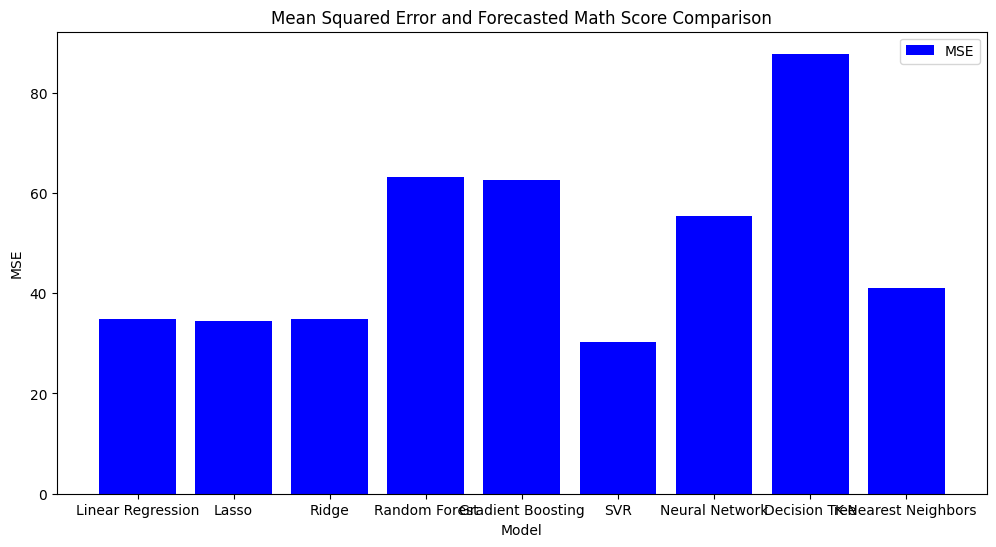

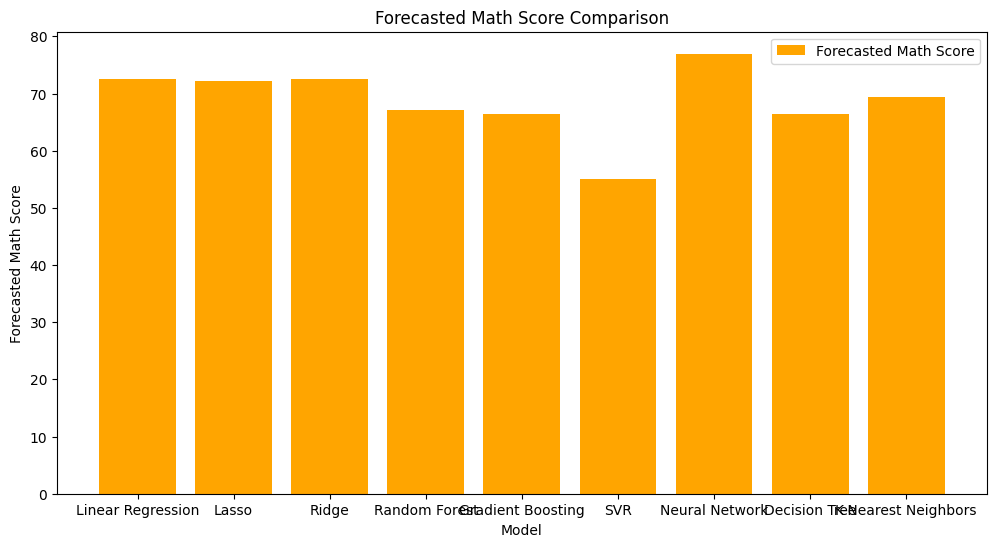

In [8]:
# Plot the MSE scores
plt.figure(figsize=(12, 6))
plt.bar(results['Model'], results['MSE'], color='blue', label='MSE')
plt.title('Mean Squared Error and Forecasted Math Score Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.legend()

# Plot the forecasted math scores
plt.figure(figsize=(12, 6))
plt.bar(results['Model'], results['Forecasted Math Score'], color='orange', label='Forecasted Math Score')
plt.title('Forecasted Math Score Comparison')
plt.xlabel('Model')
plt.ylabel('Forecasted Math Score')
plt.legend()

plt.show()

*** Comparing Linear Regression Models Using Python ~ Complete Code ***

In [ ]:
### Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor  # Added Decision Tree
from sklearn.neighbors import KNeighborsRegressor  # Added K-Nearest Neighbors
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset.Replace with your actual dataset file)

url= "https://raw.githubusercontent.com/KenDaupsey/Comparing-Linear-Regression-Models-Python/main/hsb2%7Edata.csv"
df = pd.read_csv(url)
df.head()
df.columns
df.describe().T
df.info()

# Select features and target variable
features = ['read', 'write']
target = 'math'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(max_iter=500, random_state=42),
    'Decision Tree': DecisionTreeRegressor(),  # Added Decision Tree
    'K-Nearest Neighbors': KNeighborsRegressor()  # Added K-Nearest Neighbors
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'MSE', 'R2 Score', 'Forecasted Math Score'])

# Forecast for an individual with 80% in reading and 75% in writing
new_data_point = pd.DataFrame({'read': [80], 'write': [75]})

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Forecast for the new data point
    forecasted_math_score = model.predict(new_data_point)[0]

    results = results.append({
        'Model': model_name,
        'MSE': mse,
        'R2 Score': r2,
        'Forecasted Math Score': forecasted_math_score
    }, ignore_index=True)

# Display the results
print(results)
# Plot the MSE scores
plt.figure(figsize=(12, 6))
plt.bar(results['Model'], results['MSE'], color='blue', label='MSE')
plt.title('Mean Squared Error and Forecasted Math Score Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.legend()

# Plot the forecasted math scores
plt.figure(figsize=(12, 6))
plt.bar(results['Model'], results['Forecasted Math Score'], color='orange', label='Forecasted Math Score')
plt.title('Forecasted Math Score Comparison')
plt.xlabel('Model')
plt.ylabel('Forecasted Math Score')
plt.legend()

plt.show()